# SUBPLEX: Towards a Better Understanding of Local Model Explanations at the Subpopulation Level

* A visual analytics system to help users understand black-box model explanations with subpopulation visual analysis <br> 
* A widget in the computational notebook to analyze model explanations as a standalone task flexibly.

<b>Model:</b> Model Binary Classification: a model which predicts whether a loan applicant will default in the future based on his or her credit records <br>
<b>Dataset:</b> A Credit Score Evaluation Dataset (FICO) <br>
<b>Audience:</b> Model Developer

In [1]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import json

from sklearn import svm


### Raw FICO Dataset

In [2]:
df = pd.read_csv(filepath_or_buffer='./fico_shap/test_data.csv', sep=',', header=0)

In [3]:
df

,Months Since Oldest Trade Open,Months Since Last Trade Open,Average Months in File,Satisfactory Trades,Trades 60+ Ever,Trades 90+ Ever,Bills Paid on Time,Months Since Last Delq.,Max Delq. Last 12M,Max Delq. Ever,...,Inq Last 6 Months,Inq Last 6 Months exl. 7 days,Unpaid Balance,Installment Burden,Revolving Trades w/ Balance,Installment Trades w/ Balance,Bank Trades w/ High Utilization Ratio,% Trades w/ Balance,y_pred,y_gt
0,185,32,130,6,3,2,67,17,1,2,...,0,0,5,64,1,1,0,50,0,0
1,110,17,48,17,0,0,100,150,7,7,...,2,2,22,67,4,3,0,64,0,1
2,86,2,48,0,3,3,33,41,1,2,...,3,3,3,79,1,3,0,100,1,1
3,407,8,90,31,0,0,100,150,7,7,...,4,4,0,76,2,2,1,45,0,0
4,141,9,67,28,1,0,97,50,1,5,...,0,0,84,89,4,4,2,89,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,131,5,57,21,0,0,95,80,1,6,...,0,0,26,81,5,2,0,100,0,0
1971,147,39,68,11,0,0,92,28,1,6,...,1,1,86,53,2,2,1,80,1,1
1972,129,6,64,18,1,1,100,150,1,7,...,4,4,6,53,5,3,0,56,0,1
1973,234,12,113,42,2,2,96,35,1,2,...,0,0,19,47,4,1,0,38,0,1


### Instance-level Explanation for each prediction (SHAP)

In [4]:
shap_values = pd.read_csv(filepath_or_buffer='./fico_shap/shap_values.csv', sep=',', header=0)
shap_values

,Months Since Oldest Trade Open,Months Since Last Trade Open,Average Months in File,Satisfactory Trades,Trades 60+ Ever,Trades 90+ Ever,Bills Paid on Time,Months Since Last Delq.,Max Delq. Last 12M,Max Delq. Ever,...,% Installment Trades,Months Since Most Recent Inq,Inq Last 6 Months,Inq Last 6 Months exl. 7 days,Unpaid Balance,Installment Burden,Revolving Trades w/ Balance,Installment Trades w/ Balance,Bank Trades w/ High Utilization Ratio,% Trades w/ Balance
0,-0.003254,-0.033128,0.110081,-0.098184,-0.019968,-0.019278,-0.126487,-0.103803,0.041109,0.006423,...,0.049383,0.022415,0.018877,0.010499,0.105056,0.000000,0.046418,0.000000,0.017997,-0.010803
1,-0.014037,-0.012079,-0.073942,-0.027783,0.004967,0.005325,0.031464,0.075681,-0.028973,-0.000539,...,-0.006304,0.017147,-0.016217,-0.006162,0.045137,0.000000,-0.007090,0.001172,0.016580,0.000000
2,0.013199,-0.009739,0.067293,0.116587,0.020060,0.027827,0.243257,0.065507,-0.030400,-0.005527,...,0.047684,-0.017389,0.026282,0.007023,-0.073214,0.003137,-0.037305,0.000000,-0.015369,-0.012518
3,0.031432,0.005531,0.021061,0.058425,0.006305,0.007081,0.030213,0.074092,-0.022890,-0.002814,...,0.001696,0.013756,-0.043948,-0.015886,0.122967,-0.002805,0.028380,-0.000912,-0.000847,-0.013301
4,0.006910,-0.002052,0.033430,-0.038909,0.002893,-0.004551,-0.013998,0.063282,-0.039470,-0.001006,...,0.013997,-0.015186,-0.018099,-0.006298,0.189634,0.003868,0.006991,-0.002227,0.025139,-0.014184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,-0.010507,0.009858,-0.053123,0.000000,0.006407,0.006001,0.007763,-0.019329,0.042527,0.000000,...,0.035838,0.013994,0.020456,0.007832,0.031236,-0.002360,-0.024251,0.000000,0.017553,0.022516
1971,0.009908,0.041751,0.030967,0.063189,-0.002691,-0.004729,0.009637,0.084625,-0.037754,-0.000890,...,0.014562,-0.012598,-0.002934,0.002419,0.186173,-0.002525,-0.027438,0.001655,0.006425,-0.007484
1972,-0.010118,0.008180,-0.035369,-0.019384,-0.002252,-0.007685,0.034052,0.076084,0.040854,0.000000,...,0.005663,0.014498,-0.051878,-0.019213,0.107896,0.004551,-0.023559,0.000000,0.016329,-0.005136
1973,0.006856,-0.001569,0.068163,0.127845,-0.010640,-0.015329,0.014522,-0.063080,0.035472,0.002894,...,0.031133,0.012694,0.015582,0.004041,0.060859,0.005384,-0.003073,-0.002771,0.016163,-0.015711


### Subpopulation Level Model Explanations
* The meaning of subpopulation/cluster is the subset of instances in the dataset with similar local explanation attributions.

## Install and Import The Widget
* If you have not installed the latest version of the widget, run the command lines in the README: https://github.com/tazitoo/Explainable-AI-Collaboration/tree/master/ipygamvis
* If you have already installed the widget, import the widget module as below.

In [5]:
import subplex_ml

### `SUBPLEX`
call the constructor `SubplexVis()` to create a GAMChart object.

In [6]:
''' create a widget object '''
widget = subplex_ml.SubplexVis()

## Widget Initialization
* The initialization consists of specifying the directory of the attribution files and the clustering method. The widget supports clustering methods available in scikit-learn (https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods).

In [7]:
''' input attribution'''
config = {}
config['features'] = shap_values.columns
config['attributions'] = shap_values.values
config['rawdata'] = df.values[:, :-2]

''' initialize clustering model from scikit learn'''
from sklearn import cluster
model = cluster.KMeans(n_clusters=3, random_state=0)

'''initialize the widget. Additional parameters can be seen in initialize() below.'''
widget.initialize(config=config, cluster_obj = model, alpha=0.8)

Run Clustering
Run Projection


In [8]:
widget

SubplexVis(aspect_ratio=1.1159965991973877, attr_range=[0.012957793281886426, 0.9723744166409619], centers=[61…

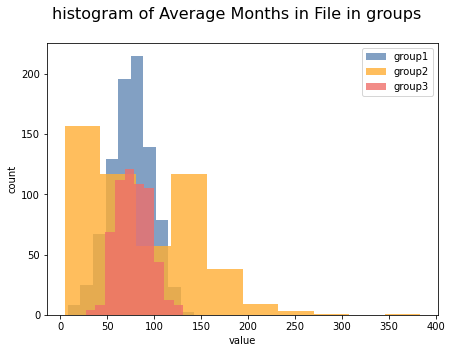

In [9]:
col = "Average Months in File"
widget.plot_val_histogram(col)

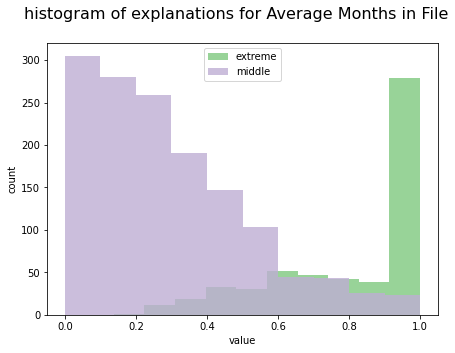

In [10]:
'''get the indices of instances have extrem values of Average Months in File (<50 or >120)'''
extreme = df[(df[col]<=50) | (df[col]>=120)].index # extrem values
middle = df[(df[col]>50) &(df[col]<120)].index  # middle values 

'''check the shap values distribution for low/high value of Average Months in File'''
widget.plot_customized_expl([{'label': 'extreme', 'index': extreme.tolist()}, 
                      {'label':'middle', 'index': middle.tolist()}], col)


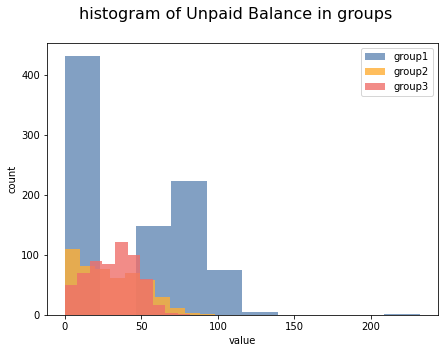

In [11]:
col = "Unpaid Balance"
widget.plot_val_histogram(col)

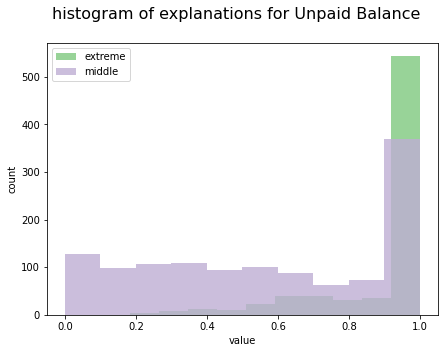

In [12]:
extreme = df[(df['Unpaid Balance']<=0) | (df['Unpaid Balance']>50)].index # extrem values 
middle = df[(df['Unpaid Balance']>0) & (df['Unpaid Balance']<=50) ].index  # middle values

'''check the shap values distribution for extrem/middle value of Unpaid Balance'''
widget.plot_customized_expl([{'label': 'extreme', 'index': extreme.tolist()}, 
                      {'label':'middle', 'index': middle.tolist()}], col)

In [13]:
widget.get_selection()

""


In [14]:
widget.get_vis_stat()

,group_id,Months Since Oldest Trade Open,Months Since Last Trade Open,Average Months in File,Satisfactory Trades,Trades 60+ Ever,Trades 90+ Ever,Bills Paid on Time,Months Since Last Delq.,Max Delq. Last 12M,...,% Installment Trades,Months Since Most Recent Inq,Inq Last 6 Months,Inq Last 6 Months exl. 7 days,Unpaid Balance,Installment Burden,Revolving Trades w/ Balance,Installment Trades w/ Balance,Bank Trades w/ High Utilization Ratio,% Trades w/ Balance
0,group1,0.070875,0.081822,0.281478,0.320480,0.044627,0.055197,0.262382,0.640534,0.222124,...,0.198240,0.152148,0.140453,0.052311,0.972374,0.030485,0.266365,0.014828,0.168723,0.091772
1,group2,0.150262,0.134987,0.899569,0.415254,0.053121,0.068261,0.265626,0.692894,0.285334,...,0.261033,0.209432,0.188722,0.070531,0.587135,0.038391,0.291896,0.018654,0.146570,0.088532
2,group3,0.084802,0.110434,0.279600,0.624943,0.061902,0.077367,0.376830,0.818882,0.264470,...,0.234196,0.197731,0.187299,0.069317,0.404491,0.036293,0.338788,0.019040,0.141727,0.084616


In [15]:
widget.get_selected_stat()

,group_id,Months Since Oldest Trade Open,Months Since Last Trade Open,Average Months in File,Satisfactory Trades,Trades 60+ Ever,Trades 90+ Ever,Bills Paid on Time,Months Since Last Delq.,Max Delq. Last 12M,...,% Installment Trades,Months Since Most Recent Inq,Inq Last 6 Months,Inq Last 6 Months exl. 7 days,Unpaid Balance,Installment Burden,Revolving Trades w/ Balance,Installment Trades w/ Balance,Bank Trades w/ High Utilization Ratio,% Trades w/ Balance


In [16]:
indices = df[(df['Bills Paid on Time']>98) & (df['y_pred']==1)].index
widget.set_highlight_instance(indices.tolist())

## Interaction 

### Select a group/cluster
* Move your mouse to the scatterplot where each dot represents a data point.
* Click any rectangle

Then you will see the selected cluster highlighted

### Select a subset (Brush)
* Move your mouse to the scatterplot
* Click and then drag your mouse to select a group of dots

Then you will see the selected circles highlighted with outlines

### Add a subgroup
After brushing a range of data, click `Add Subgroup` button. Then a new group will be created.

### Remove an added subgroup
Check the box beside the created subgroup. Then click the `Remove Subgroup` button.


### Sort the attribution
* Move to the table view on the right hand side.
* Click the column name `Features`, or `Group {i}`, or `Distribution`.


## Additional Configurations of Initialization 

###  ``initialize()``
`initialize()` is the function that you set up your widget. It contains the following four parameters:
* config: a `dict` type value, must contain 'features' for feature names, and 'attributions' for attribution values.
* cluster_obj: a clustering model object. 
    * Optional (default=None). It can be either a standard sklearn clustering models or a customized clustering model. A widget will not run the input clustering model when `plain_labels` is specified.
    * sklearn model, check the following references to learn more: 
        * https://scikit-learn.org/stable/modules/clustering.html
        * https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html
    * customized model: please follow the naming rules as in the sklearn library. It should implement at least a `fit()` function, and put the clustering labels in the `label_` variable.
* plain_labels: a numpy array of clustering labels for each instance. 
    * Optional (default=None). If this is None, then the `cluster_obj` must be specified.
* projection: a 2D numpy array of projection coordinates for each instance (map the high-dimensional instances into a 2D space). 
    * Optional (default=None). If this is None, a default dimensionality reduction algorithm `Lamp` will be run to generate projection coordinates.


    Run the following cell to see the result. Compare its usage with the one on the top.


## Additional APIs

###  ``get_selection()``
`get_selection()` returns you the attributions of selected instances.

Brush any subset of dots and then re-run the cell below:

In [17]:
selected = widget.get_selection()
selected.head()

,Months Since Oldest Trade Open,Months Since Last Trade Open,Average Months in File,Satisfactory Trades,Trades 60+ Ever,Trades 90+ Ever,Bills Paid on Time,Months Since Last Delq.,Max Delq. Last 12M,Max Delq. Ever,...,% Installment Trades,Months Since Most Recent Inq,Inq Last 6 Months,Inq Last 6 Months exl. 7 days,Unpaid Balance,Installment Burden,Revolving Trades w/ Balance,Installment Trades w/ Balance,Bank Trades w/ High Utilization Ratio,% Trades w/ Balance
0,0.058118,0.082027,0.620845,0.243267,0.015377,0.063084,0.148489,0.395131,0.150721,0.021503,...,0.000000,0.108205,0.845747,0.339927,1.000000,0.059531,0.136226,0.010513,0.379543,0.025236
1,0.067296,0.073662,0.387901,0.189405,0.000000,0.000000,0.090259,0.221549,0.095700,0.003660,...,0.020733,0.046556,1.000000,0.340776,0.321232,0.003978,0.335318,0.025629,0.051930,0.009189
2,0.017967,0.119363,0.392724,0.148398,0.051253,0.050291,0.247942,0.598931,0.230525,0.013085,...,0.247760,0.132974,0.166804,0.055602,1.000000,0.053340,0.194543,0.007489,0.208099,0.018841
3,0.179043,0.020146,1.000000,0.675364,0.042370,0.044672,0.219297,0.517441,0.224713,0.009464,...,0.306628,0.118438,0.161688,0.061808,0.504133,0.005812,0.080785,0.022659,0.111660,0.100033
4,0.006704,0.062593,0.493143,0.623596,0.057007,0.055629,0.301800,0.709034,0.276113,0.015460,...,0.011684,0.573426,0.202659,0.077599,1.000000,0.000406,0.255961,0.028517,0.259016,0.109788


###  ``get_vis_stat()``
`get_vis_stat()` returns you the attributions of all the groups.

See the example below:

In [18]:
widget.get_vis_stat()

,group_id,Months Since Oldest Trade Open,Months Since Last Trade Open,Average Months in File,Satisfactory Trades,Trades 60+ Ever,Trades 90+ Ever,Bills Paid on Time,Months Since Last Delq.,Max Delq. Last 12M,...,% Installment Trades,Months Since Most Recent Inq,Inq Last 6 Months,Inq Last 6 Months exl. 7 days,Unpaid Balance,Installment Burden,Revolving Trades w/ Balance,Installment Trades w/ Balance,Bank Trades w/ High Utilization Ratio,% Trades w/ Balance
0,group1,0.070875,0.081822,0.281478,0.320480,0.044627,0.055197,0.262382,0.640534,0.222124,...,0.198240,0.152148,0.140453,0.052311,0.972374,0.030485,0.266365,0.014828,0.168723,0.091772
1,group2,0.150262,0.134987,0.899569,0.415254,0.053121,0.068261,0.265626,0.692894,0.285334,...,0.261033,0.209432,0.188722,0.070531,0.587135,0.038391,0.291896,0.018654,0.146570,0.088532
2,group3,0.084802,0.110434,0.279600,0.624943,0.061902,0.077367,0.376830,0.818882,0.264470,...,0.234196,0.197731,0.187299,0.069317,0.404491,0.036293,0.338788,0.019040,0.141727,0.084616


###  ``get_selected_stat()``
`get_selected_stat()` returns you the average group attributions from the instances that are selected by brushing. In other words, they are the values for the outlined bars in the table view of the widget.

See the example below:

In [19]:
widget.get_selected_stat()

,group_id,Months Since Oldest Trade Open,Months Since Last Trade Open,Average Months in File,Satisfactory Trades,Trades 60+ Ever,Trades 90+ Ever,Bills Paid on Time,Months Since Last Delq.,Max Delq. Last 12M,...,% Installment Trades,Months Since Most Recent Inq,Inq Last 6 Months,Inq Last 6 Months exl. 7 days,Unpaid Balance,Installment Burden,Revolving Trades w/ Balance,Installment Trades w/ Balance,Bank Trades w/ High Utilization Ratio,% Trades w/ Balance
0,group1,0.062901,0.064742,0.352435,0.311020,0.028522,0.035459,0.165878,0.397899,0.168600,...,0.150226,0.146924,0.127131,0.048222,0.983439,0.024697,0.319513,0.012949,0.263429,0.081131
1,group2,0.141160,0.118063,0.919983,0.486138,0.047646,0.059504,0.252931,0.599513,0.255376,...,0.278057,0.227344,0.238651,0.088524,0.559575,0.034367,0.326702,0.017994,0.164604,0.085327
2,group3,0.069652,0.190762,0.374461,0.638204,0.046856,0.050975,0.273072,0.652822,0.274458,...,0.280562,0.293758,0.366866,0.135733,0.422908,0.045459,0.588474,0.025847,0.270818,0.078088


### `set_highlight_instance()`
`set_highlight_instance()` will highlight the target instances in both scatterplot and the table view.

Run the cell below and then check the UI.

In [20]:
indices = df[(df['Bills Paid on Time']>98)&(df['y_pred']==1)].index
widget.set_highlight_instance(indices.tolist())

In [21]:
widget

SubplexVis(aspect_ratio=1.1159965991973877, attr_range=[0.012957793281886426, 0.9723744166409619], centers=[61…

## Method Class Variables

### ``examples``
`examples` is a list of indices of selected instances.

Brush the scatterplot then re-run the cell below.

In [23]:
widget.examples

[12,
 17,
 18,
 28,
 34,
 37,
 38,
 39,
 41,
 45,
 49,
 51,
 52,
 57,
 67,
 77,
 78,
 79,
 82,
 83,
 84,
 89,
 93,
 95,
 102,
 103,
 115,
 117,
 121,
 122,
 133,
 145,
 152,
 156,
 158,
 183,
 185,
 194,
 228,
 231,
 238,
 239,
 247,
 248,
 250,
 257,
 261,
 266,
 273,
 282,
 292,
 304,
 305,
 307,
 308,
 309,
 312,
 318,
 319,
 326,
 327,
 331,
 332,
 335,
 343,
 348,
 352,
 361,
 364,
 366,
 372,
 382,
 387,
 392,
 395,
 396,
 404,
 406,
 422,
 437,
 443,
 444,
 469,
 487,
 492,
 512,
 515,
 516,
 519,
 538,
 541,
 549,
 559,
 560,
 563,
 574,
 610,
 623,
 627,
 632,
 634,
 638,
 639,
 641,
 646,
 649,
 650,
 652,
 655,
 657,
 672,
 680,
 687,
 689,
 697,
 699,
 708,
 712,
 713,
 714,
 715,
 728,
 746,
 748,
 764,
 786,
 787,
 789,
 790,
 832,
 851,
 852,
 865,
 893,
 895,
 901,
 902,
 904,
 907,
 957,
 960,
 964,
 968,
 969,
 970,
 971,
 974,
 975,
 981,
 984,
 1000,
 1004,
 1006,
 1009,
 1012,
 1015,
 1020,
 1029,
 1031,
 1049,
 1056,
 1059,
 1087,
 1104,
 1108,
 1114,
 1120,
 1131

### ``group_num``
`group_num` is the number of groups in total.

Add or remove subgroups and then re-run the cell below.

In [22]:
widget.group_num

3

### `centers`
`centers` returns the index of the centroid point in the scatterplot.

In [24]:
widget.centers

[616, 1814, 871]